## **Project #1: Bigmart Sale Prediction**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Initializing Packages and Importing Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

train = pd.read_csv("/content/drive/MyDrive/BigMart/Train (1).csv") 
test = pd.read_csv("/content/drive/MyDrive/BigMart/Test (1).csv") 

In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,train,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,train,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,test,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,test,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,test,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,test,1845.5976


In [6]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,train,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,train,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22722,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,test,2778.3834
22723,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,test,549.2850
22724,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,test,1193.1136
22725,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,test,1845.5976


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,train,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,train,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,train,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,train,NaN


# **Taking a peak at our data**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22727 entries, 0 to 22726
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            22727 non-null  object 
 1   Item_Weight                18825 non-null  float64
 2   Item_Fat_Content           22727 non-null  object 
 3   Item_Visibility            22727 non-null  float64
 4   Item_Type                  22727 non-null  object 
 5   Item_MRP                   22727 non-null  float64
 6   Outlet_Identifier          22727 non-null  object 
 7   Outlet_Establishment_Year  22727 non-null  int64  
 8   Outlet_Size                16301 non-null  object 
 9   Outlet_Location_Type       22727 non-null  object 
 10  Outlet_Type                22727 non-null  object 
 11  source                     22727 non-null  object 
 12  Item_Outlet_Sales          17046 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,18825.000000,22727.000000,22727.000000,22727.000000,17046.000000
mean,12.817153,0.066020,141.000404,1997.831126,2181.288914
std,4.649094,0.051510,62.156187,8.371516,1706.449556
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027027,93.909400,1987.000000,833.914500
50%,12.600000,0.053976,142.481200,1999.000000,1794.331000
75%,16.750000,0.094219,185.792400,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **1. Exploratory Data Analysis (EDA)**
## **1.1. Univariate Distribution**
***1.1.1. Distribution of the target variable : Item_Outlet_Sales ***

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

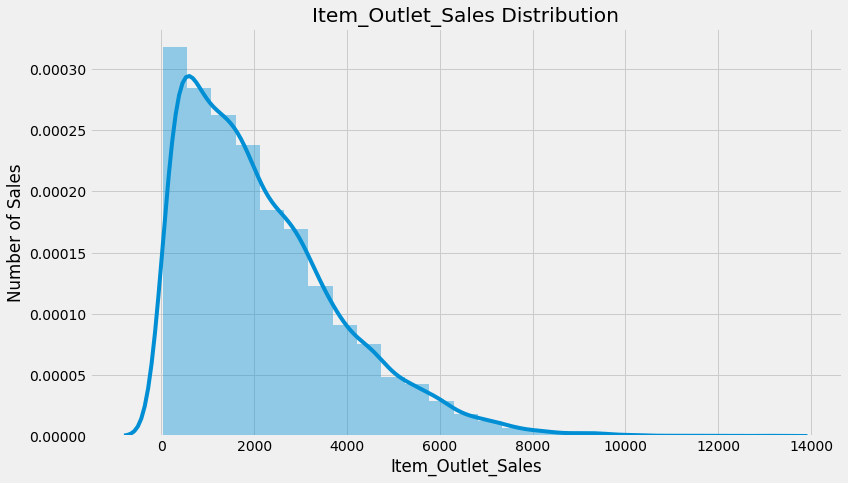

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(test.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [11]:
print ("Skew is:", test.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % test.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


## **1.1.2. Numerical Variables**

In [12]:
numeric_features = test.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [13]:
numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [14]:
corr = numeric_features.corr()

print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


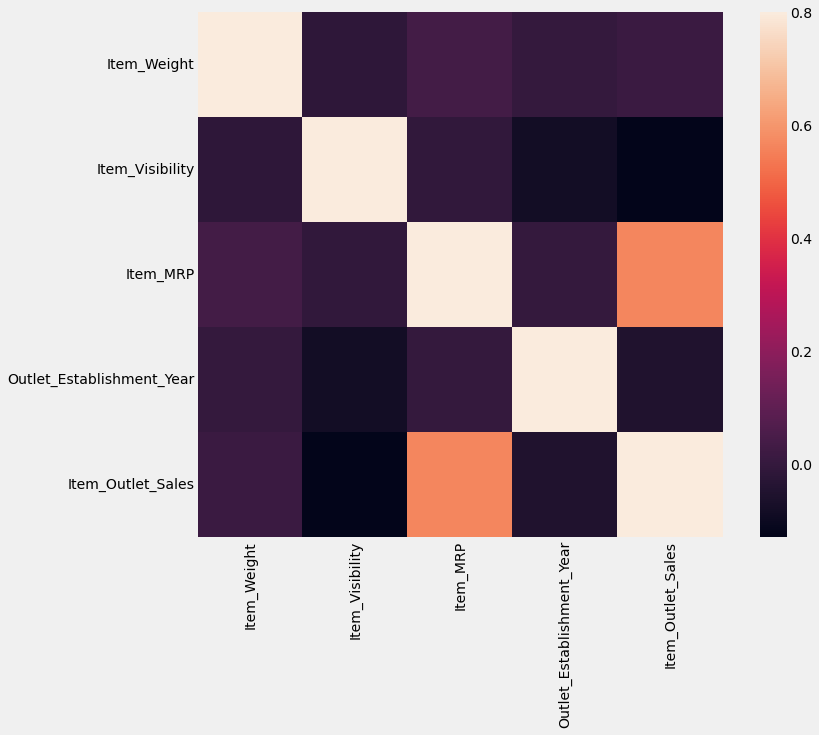

In [15]:

#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

# **1.1.3. Categorical Variables**
**1.1.3.1. Distribution of the Item_Fat_Content**

In [16]:
train.Item_Fat_Content.value_counts()

Low Fat    13574
Regular     7713
LF           838
reg          312
low fat      290
Name: Item_Fat_Content, dtype: int64

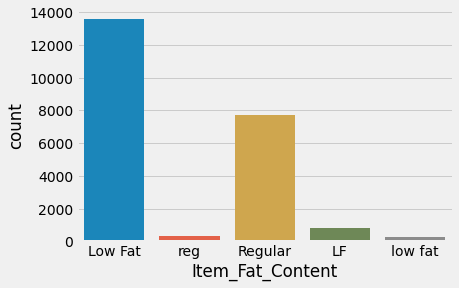

In [17]:
sns.countplot(train.Item_Fat_Content)

**1.1.3.2. Distribution of the Item_Type**

In [18]:
train.Item_Type.value_counts()

Fruits and Vegetables    3245
Snack Foods              3189
Household                2458
Frozen Foods             2282
Dairy                    1818
Baking Goods             1734
Canned                   1733
Health and Hygiene       1378
Soft Drinks              1171
Meat                     1161
Breads                    667
Hard Drinks               576
Others                    449
Starchy Foods             417
Breakfast                 296
Seafood                   153
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

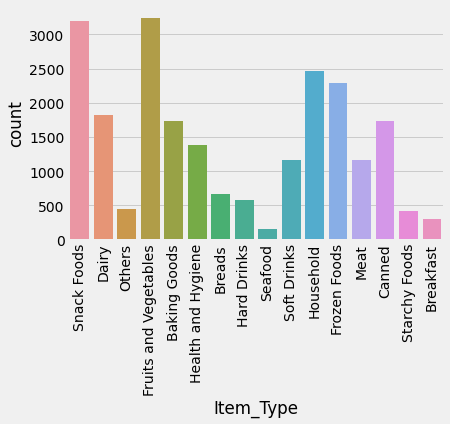

In [19]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

**1.1.3.3. Distribution of the Outlet_Size**

In [20]:
train.Outlet_Size.value_counts()

Medium    7448
Small     6368
High      2485
Name: Outlet_Size, dtype: int64

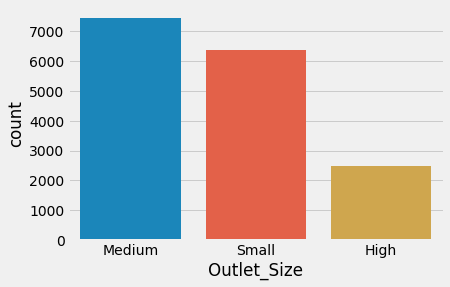

In [21]:
sns.countplot(train.Outlet_Size)

# **1.1.3.4. Distribution of the Outlet_Location_Type**

In [22]:
train.Outlet_Location_Type.value_counts()

Tier 3    8933
Tier 2    7426
Tier 1    6368
Name: Outlet_Location_Type, dtype: int64

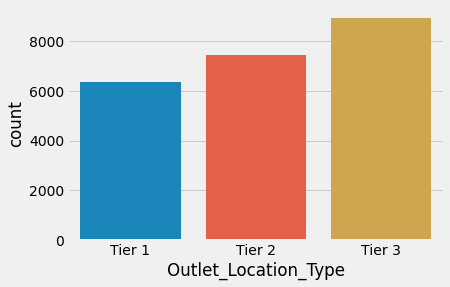

In [23]:
sns.countplot(train.Outlet_Location_Type)

**1.1.3.5. Distribution of the Outlet_Type**

In [24]:
train.Outlet_Type.value_counts()

Supermarket Type1    14871
Grocery Store         2888
Supermarket Type3     2494
Supermarket Type2     2474
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

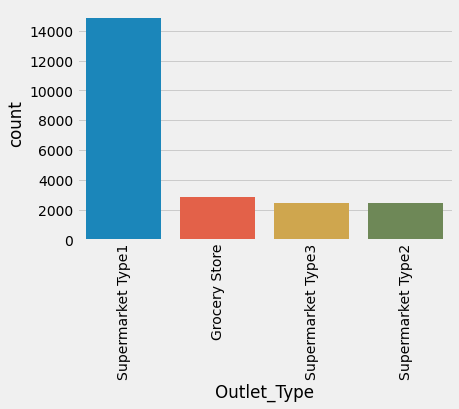

In [25]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

.2.2.2. Impact of Item_Fat_Content on Item_Outlet_Sales

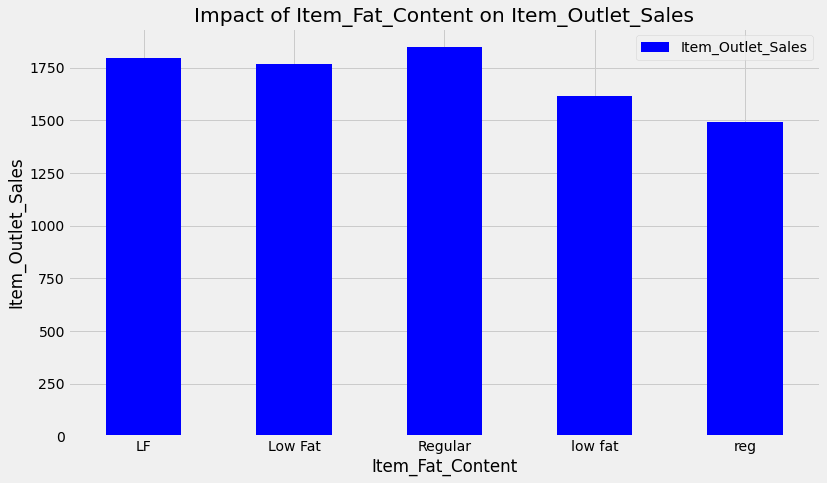

In [26]:
Item_Fat_Content_pivot = \
test.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

1.2.2.3. Impact of Outlet_Identifier on Item_Outlet_Sales

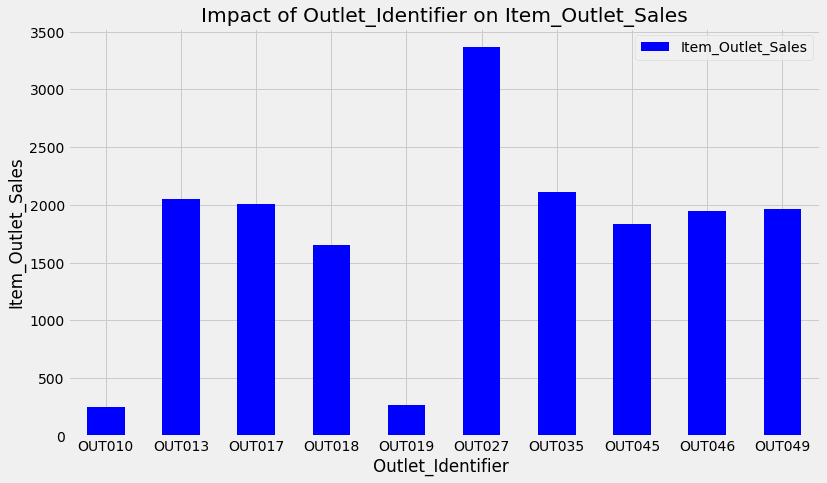

In [27]:
Outlet_Identifier_pivot = \
test.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [28]:
test.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [29]:
test.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


1.2.2.4. Impact of Outlet_Size on Item_Outlet_Sales

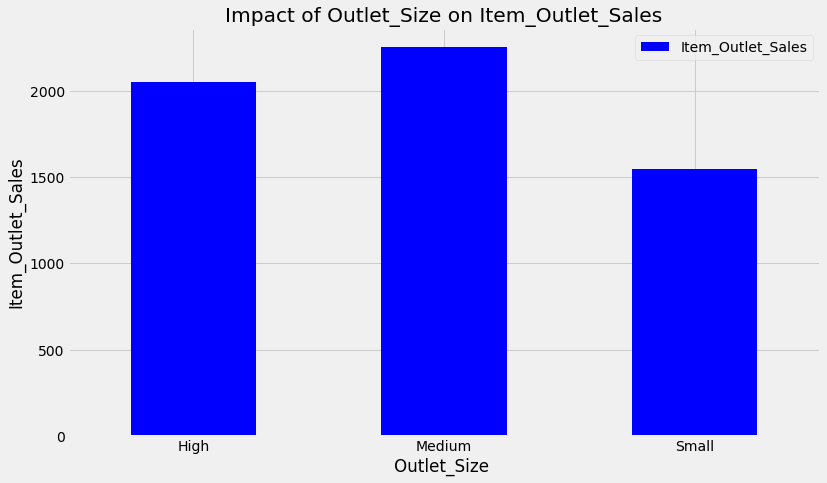

In [30]:
Outlet_Size_pivot = \
test.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

1.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales

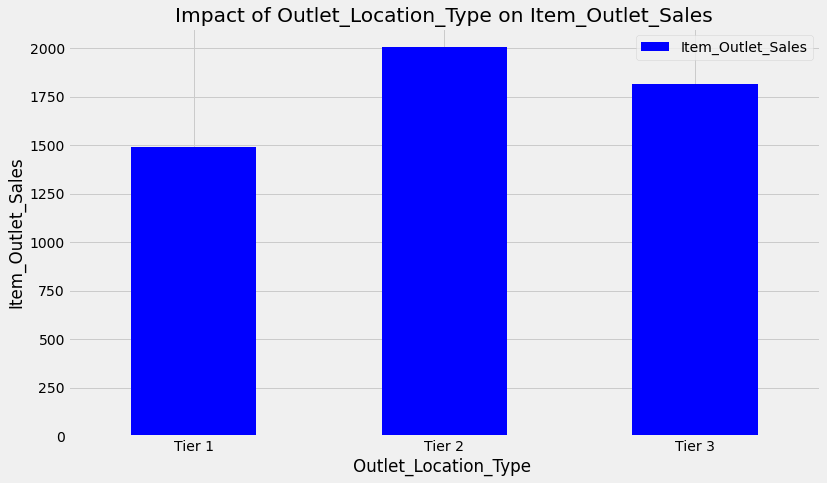

In [31]:
Outlet_Location_Type_pivot = \
test.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [32]:
test.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


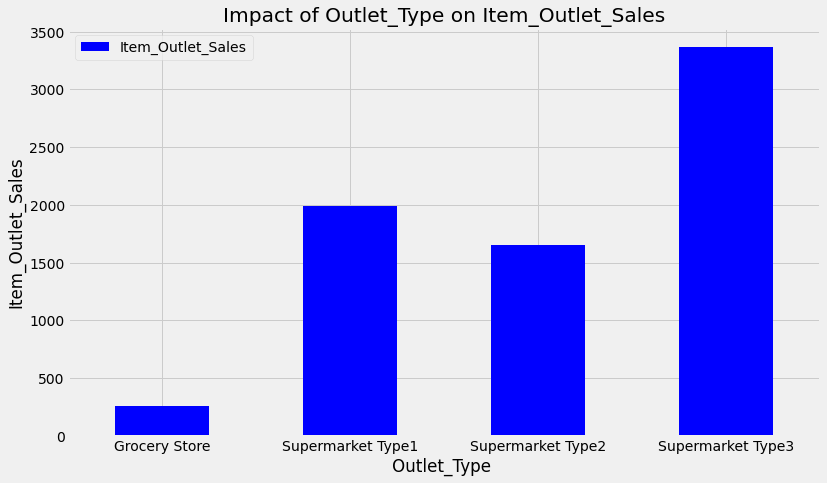

In [33]:
Outlet_Type_pivot = \
test.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


































1.2.2.7. Impact of Item_Type on Item_Outlet_Sales

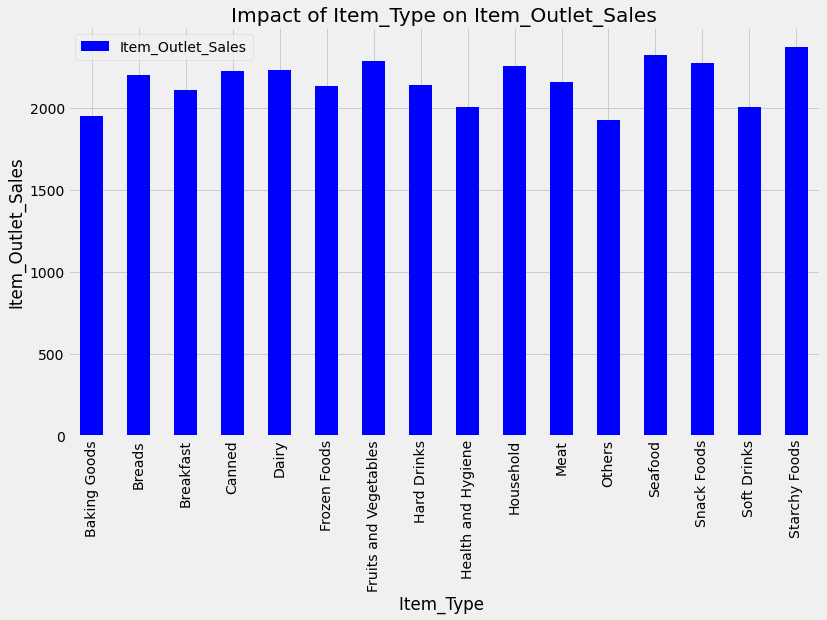

In [34]:
pivoTable = \
test.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

# **2. Data Pre-Processing**
## **2.1. Looking for missing values **

In [36]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv("/content/drive/MyDrive/BigMart/Data (1).csv",index=False)
print(train.shape, test.shape, data.shape)

(22727, 13) (14204, 13) (36931, 13)


In [54]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,source,Item_Outlet_Sales,Outlet_Years,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Visibility_MeanRatio
0,FDW58,20.750,0.007565,Snack Foods,107.8622,OUT049,1999,train,NaN,14,...,0,0,0,0,0,0,0,0,1,1.026414
1,FDW14,8.300,0.038428,Dairy,87.3198,OUT017,2007,train,NaN,6,...,0,1,0,0,0,0,0,0,0,1.110417
2,NCN55,14.600,0.099575,Others,241.7538,OUT010,1998,train,NaN,15,...,0,0,0,0,0,0,0,0,0,1.800943
3,FDQ58,7.315,0.015388,Snack Foods,155.0340,OUT017,2007,train,NaN,6,...,0,1,0,0,0,0,0,0,0,1.339169
4,FDY38,13.600,0.118599,Dairy,234.2300,OUT027,1985,train,NaN,28,...,0,0,0,0,1,0,0,0,0,0.905551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36926,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,1987,test,2778.3834,26,...,1,0,0,0,0,0,0,0,0,0.886733
36927,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,2002,test,549.2850,11,...,0,0,0,0,0,0,1,0,0,1.000976
36928,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,2004,test,1193.1136,9,...,0,0,0,0,0,1,0,0,0,0.999053
36929,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,2009,test,1845.5976,4,...,0,0,1,0,0,0,0,0,0,1.077823


## **2.2. Imputing Missing Values**

In [37]:
 #aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [38]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [39]:

print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 6341
Final #missing: 0


2.3. Imputing Outlet_size with the mode

In [40]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [41]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 10442
Final #missing: 0


## **3. Feature Engineering**

**3.1. Should we combine Outlet_Type?**

In [42]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


3.2. Item_Visibility minimum value 0

In [43]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [44]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 2284
Final #zeros: 0


3.3. Determine the years of operation of a store

In [45]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    36931.000000
mean        15.169045
std          8.371459
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

3.4. Create a broad category of Type of Item

In [46]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              26527
Non-Consumable     6971
Drinks             3433
Name: Item_Type_Combined, dtype: int64

**3.5. Modify categories of Item_Fat_Content**

In [47]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    22059
Regular    12537
LF          1360
reg          507
low fat      468
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    23887
Regular    13044
Name: Item_Fat_Content, dtype: int64


In [55]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Series([], Name: Item_Fat_Content, dtype: int64)

### **4. Feature Transformations**

4.1. Creating variable Item_Visibility_MeanRatio

In [51]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()


count    36931.000000
mean         1.061845
std          0.235904
min          0.836210
25%          0.920498
50%          0.998647
75%          1.070548
max          2.787124
Name: Item_Visibility_MeanRatio, dtype: float64

**4.2. Numerical and Categorical Variables – Dummy variables**


In [49]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [50]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
source                        object
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O